# Insurance price prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Data cleaning/preprocessing

In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.duplicated().sum()

1

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 2.Exploratory data analysis
### Univariate analysis

In [12]:
df["age"].nunique()

47

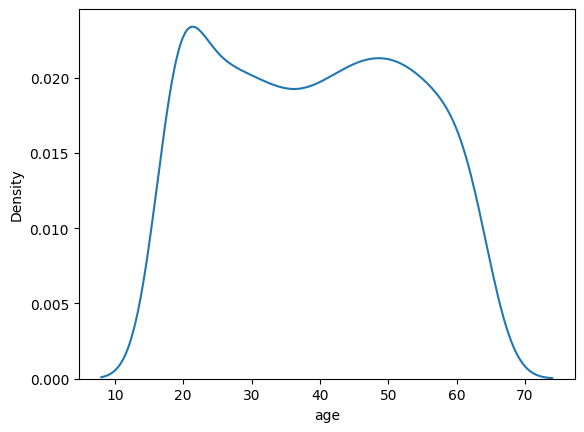

In [13]:
sns.kdeplot(df["age"])
plt.show()

In [14]:
df["age"].mode()

0    18
Name: age, dtype: int64

* majority of the people are teenagers whos age around 18

In [15]:
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

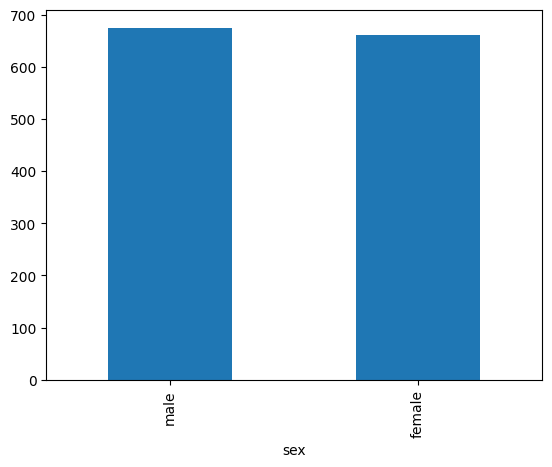

In [16]:
df["sex"].value_counts().plot(kind="bar")
plt.show()

* in the given dataset ,both male and female are almost equal in number

In [17]:
df["bmi"].nunique()

548

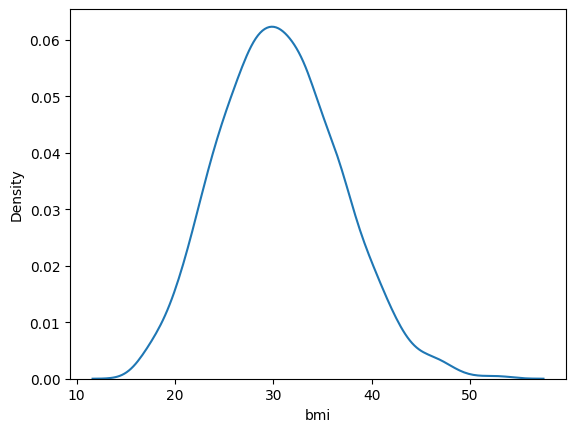

In [18]:
sns.kdeplot(df["bmi"])
plt.show()

* the bmi of majority people in the dataset is around 30

In [19]:
df["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

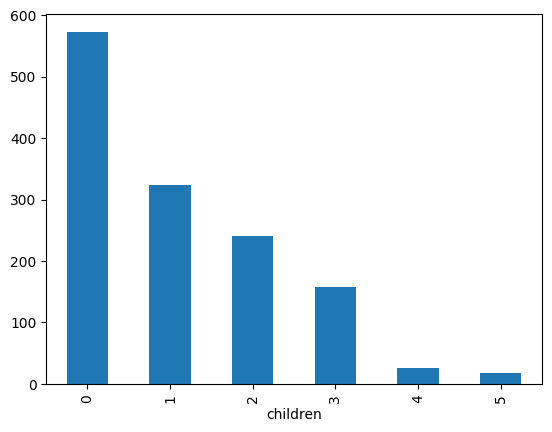

In [20]:
df["children"].value_counts().plot(kind="bar")
plt.show()

* majority of the people have no children

In [21]:
df["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

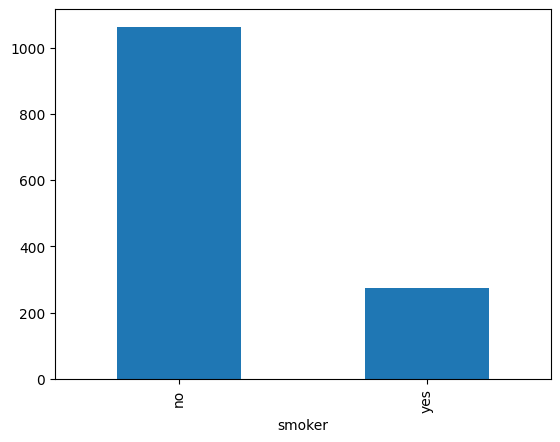

In [22]:
df["smoker"].value_counts().plot(kind="bar")
plt.show()

* in the above dataset,majority are smokers

In [23]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

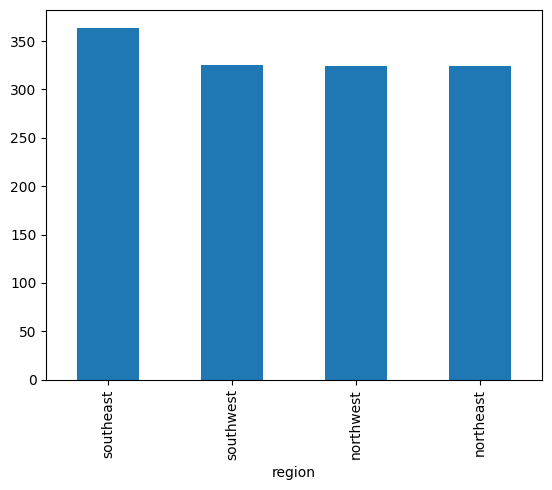

In [24]:
df["region"].value_counts().plot(kind="bar")
plt.show()

* number of people from all region are almost same

In [25]:
df["charges"].min()

1121.8739

In [26]:
df["charges"].max()

63770.42801

In [27]:
df["charges"].mean()

13279.121486655948

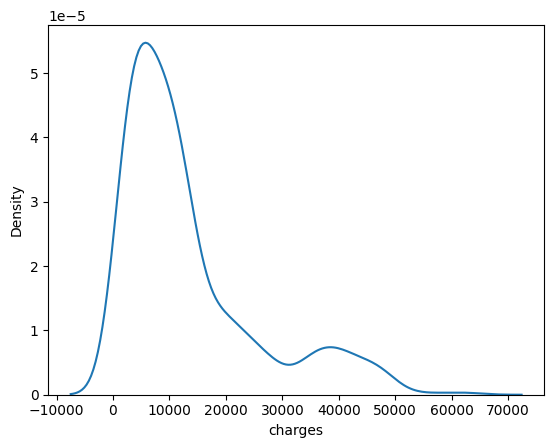

In [28]:
sns.kdeplot(df["charges"])
plt.show()

### Bivariate analysis

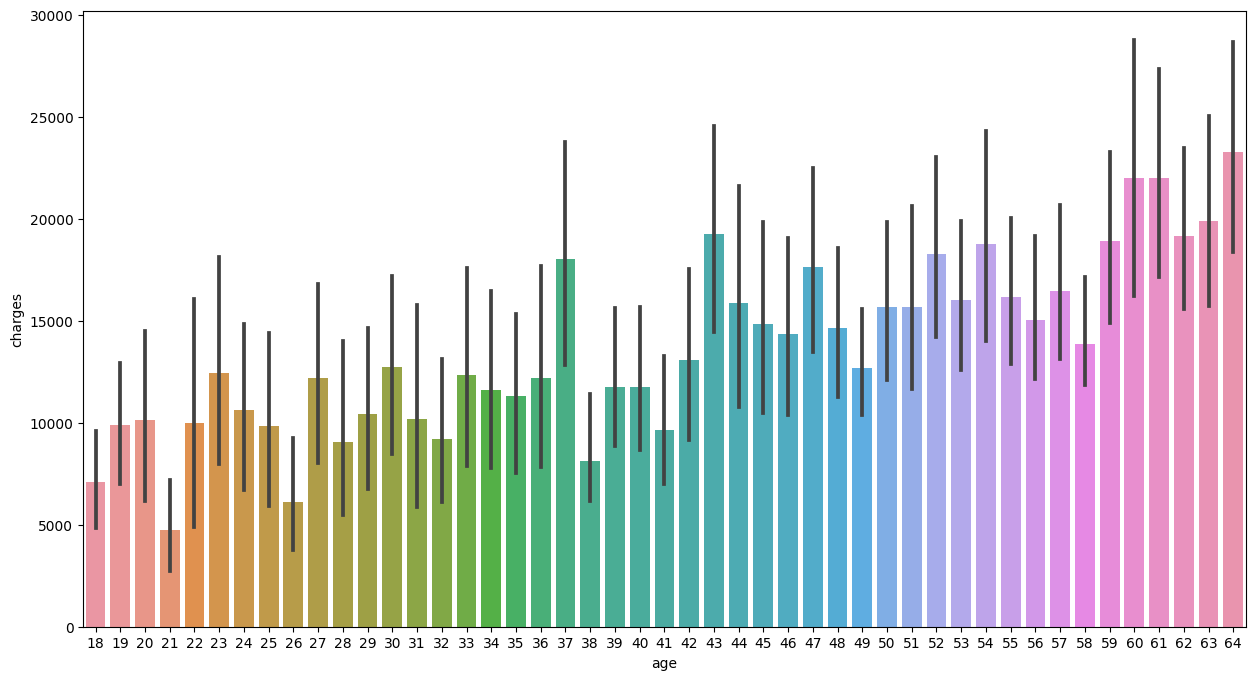

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x="age",y="charges",data=df)
plt.show()

* here we can see a slight linear relation of age and charges.As the age increases,insurance price increases

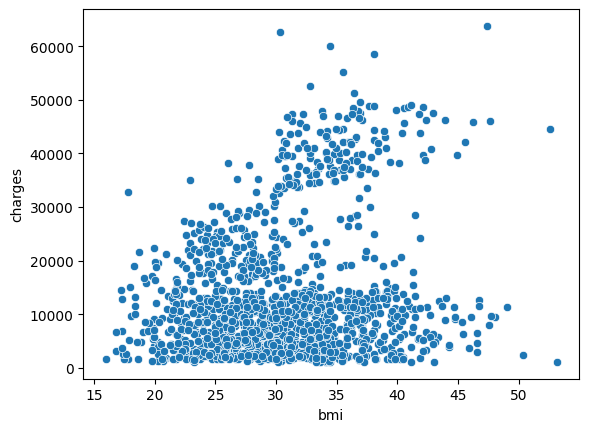

In [30]:
sns.scatterplot(x="bmi",y="charges",data=df)
plt.show()

* for people with bmi around 35,gets high insurance amount

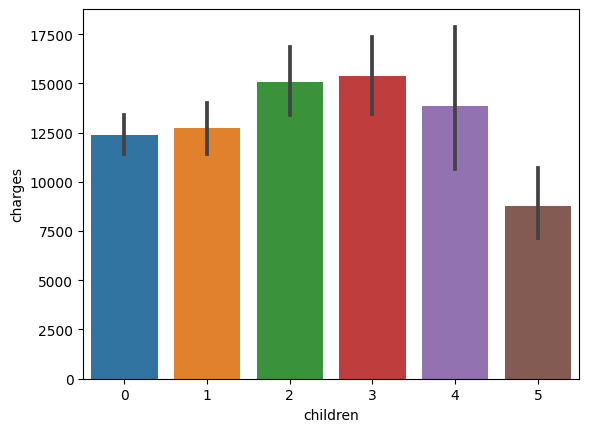

In [31]:
sns.barplot(x="children",y="charges",data=df)
plt.show()

* people with 2 or 3 children get highest average insurance amount.for poeple with 5 children get least average insurance amount

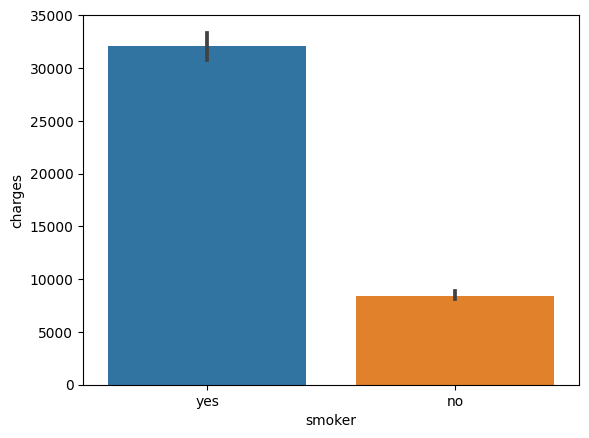

In [32]:
sns.barplot(x="smoker",y="charges",data=df)
plt.show()

* the average insurance amount of smokers are higher than non smokers

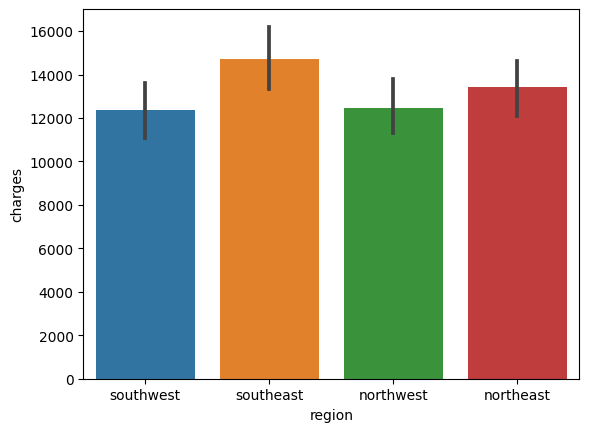

In [33]:
sns.barplot(x="region",y="charges",data=df)
plt.show()

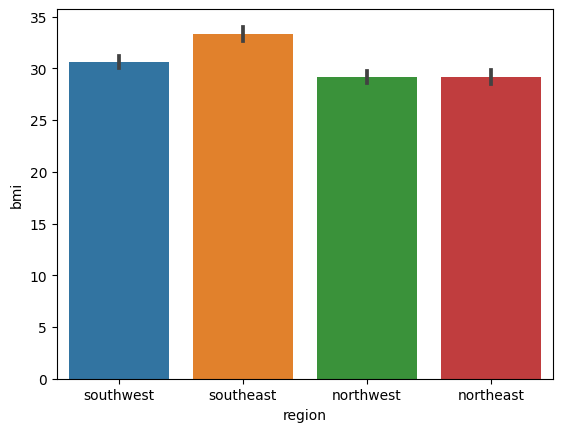

In [34]:
sns.barplot(x="region",y="bmi",data=df)
plt.show()

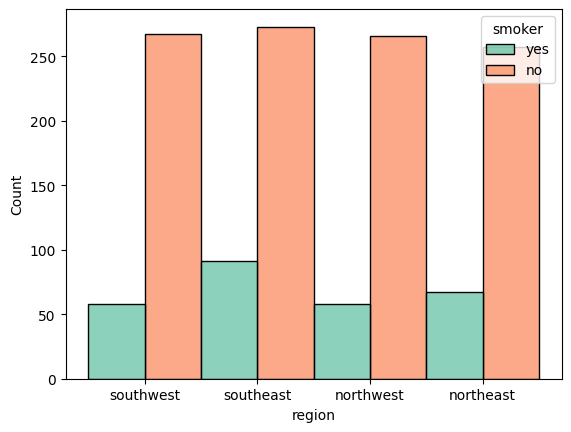

In [35]:
sns.histplot(x="region",hue="smoker",data=df,stat="count",multiple="dodge",palette="Set2")
plt.show()

* people from southeat gets highest average insurance amount
*  highest amount of smokers are from southeast region

## Multivariate analysis

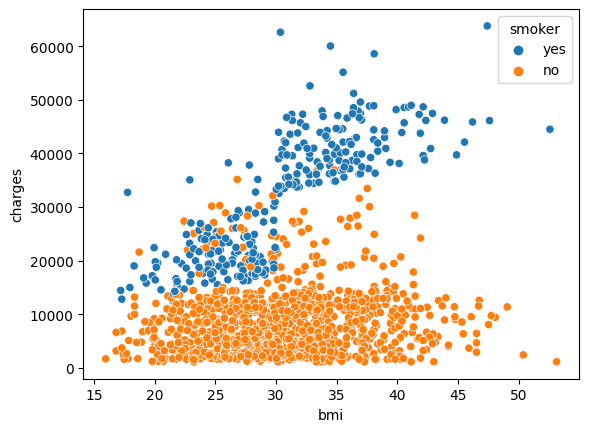

In [36]:
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker")
plt.show()

* the insurance amount of smokers are higher than non smokers inspite of their bmi 

## 3.Feature engineering
### outlier handling

In [37]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: >

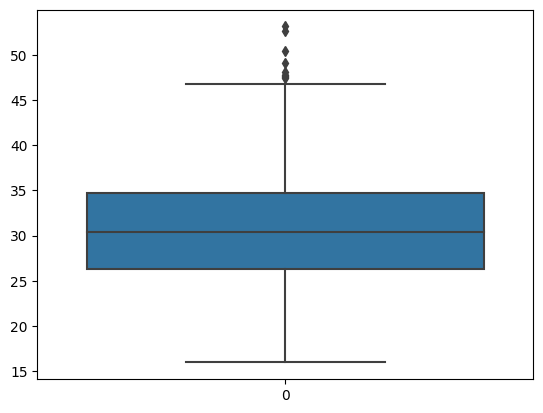

In [38]:
sns.boxplot(df["bmi"])

In [39]:
q1=np.quantile(df["bmi"],0.25)
q3=np.quantile(df["bmi"],0.75)
iqr=q3-q1
ub=q3+(iqr*1.5)
lb=q1-(iqr*1.5)
print("iqr",iqr)
print("upper bound",ub)
print("lower bound",lb)

iqr 8.410000000000004
upper bound 47.31500000000001
lower bound 13.674999999999994


In [40]:
for i in df["bmi"]:
    if i>ub:
        df["bmi"]=df["bmi"].replace(i,ub)
    if i<lb:
        df["bmi"]=df["bmi"].replace(i,lb)
    else:
        continue
        

C:\Users\Biji\AppData\Local\Temp\ipykernel_6040\1550096894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bmi"]=df["bmi"].replace(i,ub)


<Axes: >

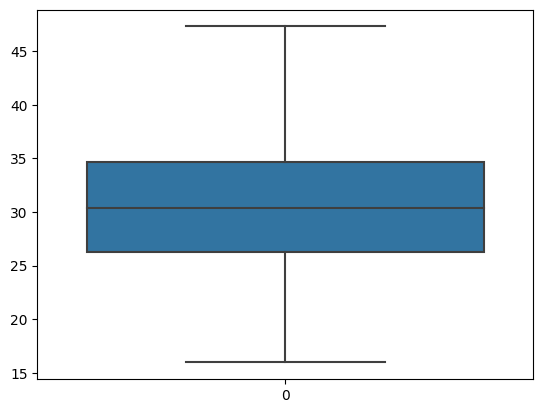

In [41]:
sns.boxplot(df["bmi"])

<Axes: >

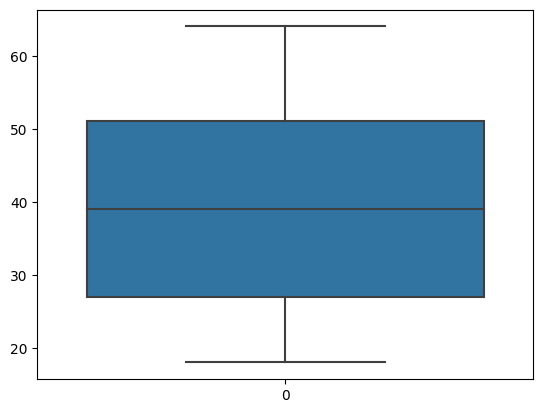

In [42]:
sns.boxplot(df["age"])

### Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df["sex"])
df["sex"]=le.transform(df["sex"])

C:\Users\Biji\AppData\Local\Temp\ipykernel_6040\210455879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"]=le.transform(df["sex"])


In [44]:
le.fit(df["smoker"])
df["smoker"]=le.transform(df["smoker"])

C:\Users\Biji\AppData\Local\Temp\ipykernel_6040\1273812610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoker"]=le.transform(df["smoker"])


In [45]:
df=df.replace({"region":{"southwest":0,"northwest":0,"northeast":0,"southeast":1}})

In [46]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


### Heat map

<Axes: >

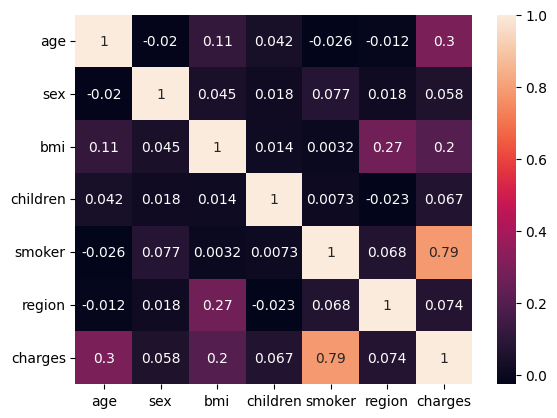

In [47]:
sns.heatmap(df.corr(),annot=True)

## 4.Model building

In [48]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
xtrain.shape

(1069, 6)

In [51]:
xtest.shape

(268, 6)

### Linear regression algorithm

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [53]:
ypred=lr.predict(xtest)

### Model validation

In [54]:
from sklearn.metrics import r2_score,mean_squared_error

In [55]:
r2_score(ytest,ypred)

0.7482742634172023

In [56]:
mean_squared_error(ytest,ypred)

32563196.780243717

### knn regression algorithm

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [58]:
ypred=knr.predict(xtest)

### Model validation

In [59]:
r2_score(ytest,ypred)

0.17360680403734952

In [60]:
mean_squared_error(ytest,ypred)

106902077.72670494

### Random forest regression algorithm

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [62]:
ypred=rf.predict(xtest)

### Model validation

In [63]:
r2_score(ytest,ypred)

0.8265039371896805

In [64]:
mean_squared_error(ytest,ypred)

22443420.011730477

### Adaboost regression algorithm

In [65]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(xtrain,ytrain)

AdaBoostRegressor()

In [66]:
ypred=ab.predict(xtest)

### Model validation

In [67]:
r2_score(ytest,ypred)

0.7846298985923472

In [68]:
mean_squared_error(ytest,ypred)

27860238.24151838

### Dynamic input prediction

In [69]:
dyn_ip=np.array([[19,0,27.900,0,1,0]])
rf.predict(dyn_ip)

C:\Users\Biji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([16997.2342985])

In [70]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


## Conclusion
* r2 score of knn regression algorithm is    0.17360680403734952
* r2 score of linear regression algorithm    0.7482742634172023
* r2 score of random forest regression algorithm   0.8265039371896805
* r2 score of adaboost regression algorithm is    0.7846298985923472
### The best machine learning model is the one developed with Random forest algorithm